# Import Module

In [1]:
import torch
import glob
import warnings 
warnings.filterwarnings('ignore')

import random
import PIL
import cv2
import os
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import time

from torch.utils.data import Dataset, DataLoader

# Check GPU

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device : {device}")

Device : cuda


# Set seed and config

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic=True
    torch.backends.cudnn.benchmark=True

In [4]:
CFG={'SEED' : 42,
     'IMAGE_SIZE' : 224,
     'EPOCHS' : 10,
     'BATCH_SIZE' : 64,
     'LR' : 0.001,
     'model_save_path' : f"/home/user1/바탕화면/HJ/AICOSS 2023 (Pnuemonia)/Codes/Cropped_3_classes.pt"}

In [5]:
seed_everything(CFG['SEED'])

# Get Data Path

In [6]:
def get_path(path):
    normal=[]
    vir=[]
    bact=[]

    normal_label = []
    vir_label = []
    bact_label = []

    for t in os.listdir(path):
        if t=='NORMAL':
            normal_path = f"{path}{t}/"
            for normal_data in glob.glob(normal_path + "/*.jpg"):
                normal.append(normal_data)
                normal_label.append(np.array([1,0,0]))

        elif t=='VIRUS':
            vir_path = f"{path}{t}/"
            for vir_data in glob.glob(vir_path + "/*.jpg"):
                vir.append(vir_data)
                vir_label.append(np.array([0,1,0]))
                
        elif t=='BACTERIA':
            bact_path = f"{path}{t}/"
            for bact_data in glob.glob(bact_path + "/*.jpg"):
                bact.append(bact_data)
                bact_label.append(np.array([0,0,1]))

    return normal, vir, bact, normal_label, vir_label, bact_label

#Train
train_path = f"/home/user1/바탕화면/HJ/Cropped_Images/train/"
train_normal, train_vir, train_bact, train_normal_label, train_vir_label, train_bact_label = get_path(train_path)

# Test
test_path = f"/home/user1/바탕화면/HJ/Cropped_Images/test/"
test_normal, test_vir, test_bact, test_normal_label, test_vir_label, test_bact_label = get_path(test_path)

In [7]:
print(f"Train Normal : {len(train_normal)}\nTrain Virus : {len(train_vir)}\nTrain Bacteria : {len(train_bact)}\n")
print(f"Test normal : {len(test_normal)}\nTest Virus : {len(test_vir)}\nTest Bacteria : {len(test_bact)}\n")

Train Normal : 1291
Train Virus : 1295
Train Bacteria : 2480

Test normal : 234
Test Virus : 148
Test Bacteria : 242



In [8]:
import glob
import shutil
import os

# path_train = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\train\\PNEUMONIA\\"

# for image in glob.glob(path_train + "/*.jpeg"):
#     os.makedirs(path_train + "bacteria", exist_ok=True)
#     os.makedirs(path_train + 'virus', exist_ok=True)
    
#     name = image.split('\\')[9]
#     if 'bacteria' in image:
#         shutil.copy(image, path_train + f"bacteria\\{name}")
#     elif 'virus' in image:
#         shutil.copy(image, path_train + f"virus\\{name}")
        
# path_val = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\PNEUMONIA\\"

# for image in glob.glob(path_val + "/*.jpeg"):
#     os.makedirs(f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\" + "bacteria", exist_ok=True)
#     os.makedirs(f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\" + 'virus', exist_ok=True)
    
#     name = image.split('\\')[9]
#     if 'bacteria' in image:
#         shutil.copy(image, f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\" + f"bacteria\\{name}")
#     elif 'virus' in image:
#         shutil.copy(image, f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\" + f"virus\\{name}")
        
# path_test = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\PNEUMONIA\\"

# for image in glob.glob(path_test + "/*.jpeg"):
#     os.makedirs(f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\" + "BACTERIA", exist_ok=True)
#     os.makedirs(f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\" + 'VIRUS', exist_ok=True)
    
#     name = image.split('\\')[9]
#     if 'bacteria' in image:
#         shutil.copy(image, f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\" + f"BACTERIA\\{name}")
#     elif 'virus' in image:
#         shutil.copy(image, f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\" + f"VIRUS\\{name}")

In [9]:
train_data = train_normal + train_vir + train_bact
train_label = train_normal_label + train_vir_label + train_bact_label

test_data = test_normal + test_vir + test_bact
test_label = test_normal_label + test_vir_label + test_bact_label

/home/user1/바탕화면/HJ/Cropped_Images/train/NORMAL/436.jpg
Image size => (1005, 1114, 3)


(-0.5, 1113.5, 1004.5, -0.5)

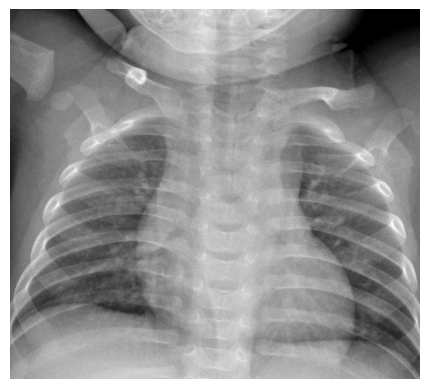

In [10]:
n = random.randint(0, len(train_data)-1)
print(f"{train_data[n]}")
img = cv2.imread(train_data[n])
print(f"Image size => {img.shape}")
plt.imshow(img)
plt.axis('off')

In [11]:
train_transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((CFG['IMAGE_SIZE'], CFG['IMAGE_SIZE'])),
    torchvision.transforms.ToTensor()
])

test_transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((CFG['IMAGE_SIZE'], CFG['IMAGE_SIZE'])),
    torchvision.transforms.ToTensor()
])

# Make Dataset

In [12]:
class Customdataset(Dataset):
    def __init__(self, path, label, transform=None):
        self.path = path
        self.label = label
        self.transform = transform
    
    def __len__(self):
        return len(self.path)
    
    def __get_img(self, path):
        img = cv2.imread(path)

        return img

    def __getitem__(self, index):
        path = self.path[index]
        label = self.label[index]

        img = self.__get_img(path)

        if self.transform is not None:
            img = self.transform(PIL.Image.fromarray(img))

        return img, torch.from_numpy(label)

In [13]:
train_dataset = Customdataset(train_data, train_label, train_transform)
train_dataloader = DataLoader(train_dataset, batch_size=CFG['BATCH_SIZE'], shuffle=True)

In [14]:
f, l = next(iter(train_dataloader))

In [15]:
print(f"Feature shape : {f[0].shape}")

Feature shape : torch.Size([3, 224, 224])


# Define Model

In [18]:
import timm

class Model(nn.Module):
    def __init__(self, classes=3):
        super().__init__()
        self.model = timm.create_model('resnet50', pretrained=True)
        self.model.fc = nn.Linear(in_features=2048, out_features=classes, bias=True)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.model(x)
        x = self.softmax(x)

        return x

In [19]:
model = Model().to(device)
model = nn.DataParallel(model).to(device)
model

model.safetensors: 100%|██████████| 102M/102M [00:08<00:00, 11.5MB/s] 


DataParallel(
  (module): Model(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (drop_block): Identity()
          (act2): ReLU(inplace=True)
          (aa): Identity()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=

# Define Loss, Optimizer

In [20]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=CFG['LR'])

# Training

In [21]:
def train_loop(dataloader, model, optimizer, loss_fn, model_save_path):
    model.train()

    size = len(dataloader)
    datasize = len(dataloader.dataset)

    loss_hist=[]
    acc_hist=[]

    for epoch in range(CFG['EPOCHS']):
        epoch_start = time.time()

        loss_item=0
        correct=0
        print(f"Start epoch : {epoch+1}")
        for batch, (X,y) in enumerate(dataloader):
            X = X.to(device).float()
            y = y.to(device).float()

            output = model(X)

            loss = loss_fn(output, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_item += loss.item()
            correct+=(output.argmax(1)==y.argmax(1)).detach().cpu().sum().item()

            if batch % 20 == 0:
                print(f"Batch loss : {(loss/size):>.5f} {batch}/{size}")

        loss_hist.append(loss_item/size)
        acc_hist.append(correct/datasize*100)

        print(f"Loss : {(loss_item/size):>.5f} ACC : {(correct/datasize*100):>.2f}%")

        epoch_end = time.time()
        print(f"End epoch : {epoch+1}")
        print(f"Epoch time : {(epoch_end-epoch_start)//60} min {(epoch_end-epoch_start)%60} sec")
        print()

    torch.save(model.state_dict(), model_save_path)

    return loss_hist, acc_hist

In [22]:
loss_hist, acc_hist = train_loop(train_dataloader, model, optimizer, loss_fn, CFG['model_save_path'])

Start epoch : 1
Batch loss : 0.01379 0/80
Batch loss : 0.01209 20/80
Batch loss : 0.00992 40/80
Batch loss : 0.00980 60/80
Loss : 0.84579 ACC : 69.32%
End epoch : 1
Epoch time : 1.0 min 0.89473557472229 sec

Start epoch : 2
Batch loss : 0.00843 0/80
Batch loss : 0.00930 20/80
Batch loss : 0.00986 40/80
Batch loss : 0.00990 60/80
Loss : 0.74433 ACC : 80.44%
End epoch : 2
Epoch time : 0.0 min 54.94976782798767 sec

Start epoch : 3
Batch loss : 0.00948 0/80
Batch loss : 0.00935 20/80
Batch loss : 0.00993 40/80
Batch loss : 0.00951 60/80
Loss : 0.74381 ACC : 80.60%
End epoch : 3
Epoch time : 0.0 min 55.73138451576233 sec

Start epoch : 4
Batch loss : 0.00817 0/80
Batch loss : 0.00787 20/80
Batch loss : 0.00896 40/80
Batch loss : 0.00894 60/80
Loss : 0.71945 ACC : 83.14%
End epoch : 4
Epoch time : 0.0 min 55.85209679603577 sec

Start epoch : 5
Batch loss : 0.00791 0/80
Batch loss : 0.00808 20/80
Batch loss : 0.00948 40/80
Batch loss : 0.00915 60/80
Loss : 0.70642 ACC : 84.15%
End epoch : 5


Text(0.5, 1.0, 'Train Loss')

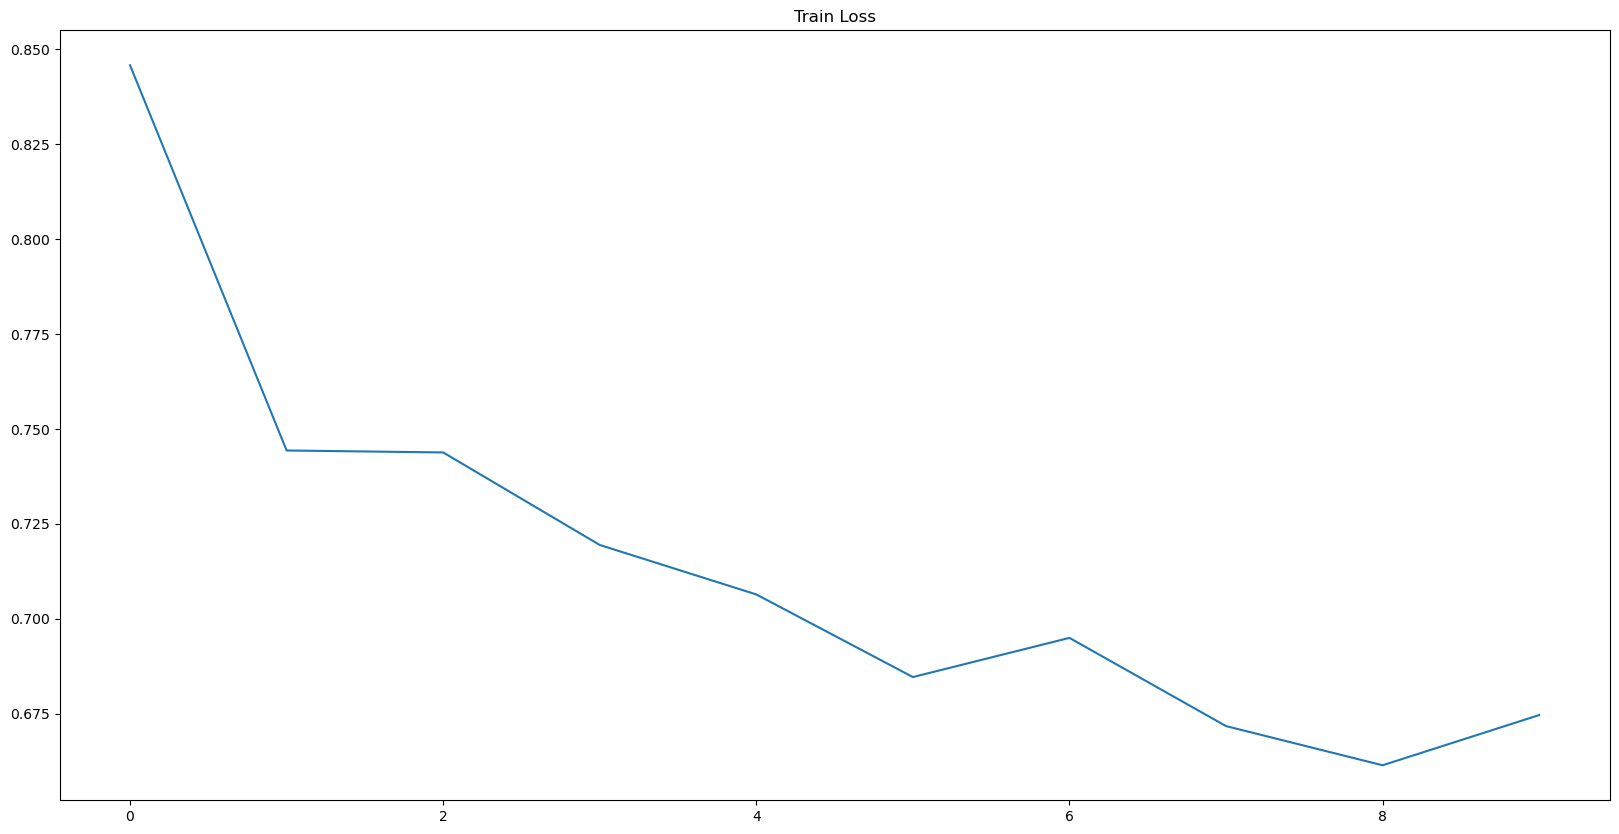

In [23]:
plt.figure(figsize=(20,10))
plt.plot(loss_hist, label='train_loss')
plt.title('Train Loss')

Text(0.5, 1.0, 'Train Acc')

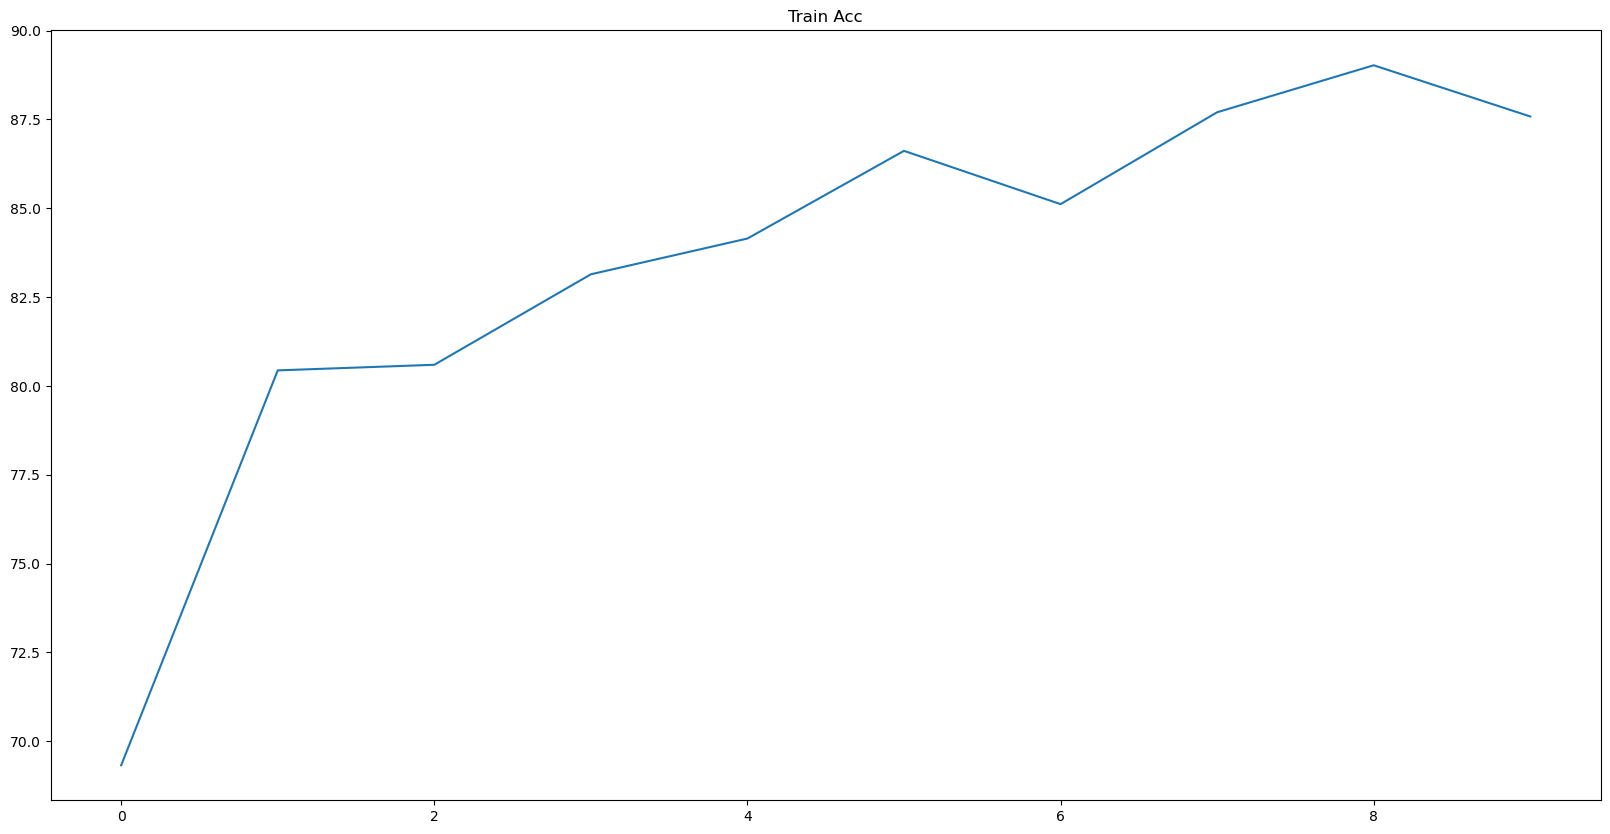

In [24]:
plt.figure(figsize=(20,10))
plt.plot(acc_hist, label='train_acc')
plt.title('Train Acc')

# TEST

In [25]:
test_dataset = Customdataset(test_data, test_label, test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [26]:
def test_loop(dataloader, model, model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()

    pred_normal=[]
    pred_virus=[]
    pred_bacteria=[]
    label_normal=[]
    label_virus=[]
    label_bacteria=[]
    
    label=[]
    pred=[]

    for (X,y) in dataloader:
        for t in y:
            label.append(t.detach().tolist())
            label_normal.append(t[0].detach().tolist())
            label_virus.append(t[1].detach().tolist())
            label_bacteria.append(t[2].detach().tolist())

        X = X.to(device).float()
        y = y.to(device).float()

        output = model(X)

        for o in output:
            pred.append(o.detach().cpu().tolist())
            pred_normal.append(o[0].detach().cpu().tolist())
            pred_virus.append(o[1].detach().cpu().tolist())
            pred_bacteria.append(o[2].detach().cpu().tolist())

    return label_normal, label_virus, label_bacteria, pred_normal, pred_virus, pred_bacteria, np.array(label), np.array(pred)

In [27]:
label_normal, label_virus, label_bacteria, pred_normal, pred_virus, pred_bacteria, label, pred  = test_loop(test_dataloader, model, CFG['model_save_path'])

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns

In [31]:
OH_pred = []

for vector in pred:
    OH_pred.append(np.argmax(vector, axis=0))

OH_label = []

for vector in label:
    OH_label.append(np.argmax(vector, axis=0))

<Axes: >

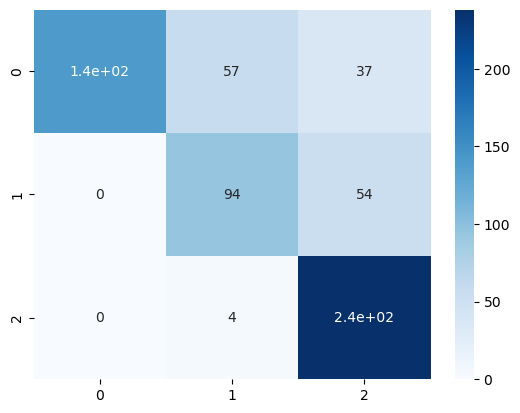

In [32]:
cm = confusion_matrix(OH_label, OH_pred)
sns.heatmap(cm, annot=True, cmap='Blues')